In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [2]:
def plot_scaler(data, col, categories=None , rates=None, c=None, X_scaled=None):
    scaler = StandardScaler()
    print(f'Columns: {[x for x in col if x not in rates]}')
    if categories is None and X_scaled is None:
        X_scaled = scaler.fit_transform(data[col])
    elif X_scaled is None:
        col = [x for x in col if x not in rates]
        X_scaled = scaler.fit_transform(data[col])

    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    print(f'Cumulative variance ratio for 2 components: {cumulative_variance_ratio[1]*100:.2f}%')
    print(f'component 3: {explained_variance_ratio[2]*100:.2f}%')

    fig, ax = plt.subplots(3, 3, figsize=(16, 12))
    ax[0, 0].bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
    ax[0, 0].set_xlabel('Principal Component')
    ax[0, 0].set_ylabel('Explained Variance Ratio')
    ax[0, 0].set_title('Explained Variance Ratio by Principal Component')
    
    ax[0, 1].plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance_ratio)
    ax[0, 1].set_xlabel('Number of components')
    ax[0, 1].set_ylabel('Cumulative explained variance')
    ax[0, 1].set_title('Scree Plot')


    feature_names = data[col].columns
    if len(feature_names) > 2:
        for i in range(len(feature_names)):
            ax[1, 0].arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
                           head_width=0.05, head_length=0.05, color='blue')
    
        for i, feature in enumerate(feature_names):
            ax[1, 0].text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15, feature,
                          color='black', ha='center', va='center')
    
        ax[1, 0].set_xlim(-1, 1)
        ax[1, 0].set_ylim(-1, 1)
        ax[1, 0].set_xlabel('Principal Component 1')
        ax[1, 0].set_ylabel('Principal Component 2')
        ax[1, 0].set_title('Correlation Circle')
        ax[1, 0].grid()
        
        for i in range(len(feature_names)):
            ax[1, 1].arrow(0, 0, pca.components_[0, i], pca.components_[2, i], 
                           head_width=0.05, head_length=0.05, color='blue')
        for i, feature in enumerate(feature_names):
            ax[1, 1].text(pca.components_[0, i] * 1.15, pca.components_[2, i] * 1.15, feature,
                          color='black', ha='center', va='center')
        ax[1, 1].set_xlim(-1, 1)
        ax[1, 1].set_ylim(-1, 1)
        ax[1, 1].set_xlabel('Principal Component 1')
        ax[1, 1].set_ylabel('Principal Component 2')
        ax[1, 1].set_title('Correlation Circle')
        ax[1, 1].grid()
        
        for i in range(len(feature_names)):
            ax[1, 2].arrow(0, 0, pca.components_[0, i], pca.components_[3, i], 
                           head_width=0.05, head_length=0.05, color='blue')
        for i, feature in enumerate(feature_names):
            ax[1, 2].text(pca.components_[0, i] * 1.15, pca.components_[3, i] * 1.15, feature,
                          color='black', ha='center', va='center')
        ax[1, 2].set_xlim(-1, 1)
        ax[1, 2].set_ylim(-1, 1)
        ax[1, 2].set_xlabel('Principal Component 1')
        ax[1, 2].set_ylabel('Principal Component 2')
        ax[1, 2].set_title('Correlation Circle')
        ax[1, 2].grid()

        scatter = ax[2, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=c, alpha=0.5)
        ax[2, 0].set_xlabel('First principal component')
        ax[2, 0].set_ylabel('Second principal component')
        ax[2, 0].set_title('Projection of Individuals')
        # cbar = plt.colorbar(scatter, ax=ax[1, 1])
        scatter = ax[2, 1].scatter(X_pca[:, 0], X_pca[:, 2], c=c, alpha=0.5)
        ax[2, 1].set_xlabel('First principal component')
        ax[2, 1].set_ylabel('Third principal component')
        ax[2, 1].set_title('Projection of Individuals')
        # cbar = plt.colorbar(scatter, ax=ax[2, 0])
        scatter = ax[2, 2].scatter(X_pca[:, 1], X_pca[:, 2], c=c, alpha=0.5)
        ax[2, 2].set_xlabel('First principal component')
        ax[2, 2].set_ylabel('Forth principal component')
        ax[2, 2].set_title('Projection of Individuals')
        # cbar = plt.colorbar(scatter, ax=ax[2, 1])
    plt.tight_layout()
    plt.show()
    return X_scaled , X_pca

In [3]:
def create_boxplot(ax, data, col):
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(f'Distribution of {col}')

def plot_boxplots(data, columns):
    numCols = len(columns)
    numRows = numCols // 3 + (numCols % 3 > 0)
    
    fig, axes = plt.subplots(numRows, 3, figsize=(15, 5 * numRows))
    axes = np.array(axes).flatten()
    
    list(map(create_boxplot, axes[:numCols], [data]*numCols, columns))
    
    plt.tight_layout()
    plt.show()

In [4]:
def plot_pairplots(data, col):
	sns.set_theme(style="ticks")
	sns.pairplot(data[col], diag_kind="kde", markers="o", plot_kws={'alpha': 0.6})
	plt.tight_layout()
	plt.show()

In [5]:
def plot_scatterplot(data, col, c=None):
    fig, ax = plt.subplots(1, 1, figsize=(16, 6))
    ax.scatter(data[col[0]], data[col[1]], c=c, alpha=0.5)
    ax.set_xlabel(col[0])
    ax.set_ylabel(col[1])
    ax.set_title('Scatter Plot')
    plt.show()

In [6]:

con = sqlite3.connect('olist.db')
cursor  = con.cursor()
cursor.execute('SELECT sql FROM sqlite_master WHERE type="table"')
res = cursor.fetchall()
df = pd.DataFrame(res, columns=['SQL'])
print(df.to_string(index=False))
con.close()

                                                                                                                                                                                                                                                                                                                   SQL
                                                                                                                                CREATE TABLE customers (\n\t"index" BIGINT, \n\tcustomer_id TEXT, \n\tcustomer_unique_id TEXT, \n\tcustomer_zip_code_prefix BIGINT, \n\tcustomer_city TEXT, \n\tcustomer_state TEXT\n)
                                                                                                                       CREATE TABLE geoloc (\n\t"index" BIGINT, \n\tgeolocation_zip_code_prefix BIGINT, \n\tgeolocation_lat FLOAT, \n\tgeolocation_lng FLOAT, \n\tgeolocation_city TEXT, \n\tgeolocation_state TEXT\n)
                                                                   

See if there is missing Data

In [7]:
con = sqlite3.connect('olist.db')
cursor  = con.cursor()
query = '''
    SELECT
        COUNT(*) AS total_rows,
        SUM(CASE WHEN customer_id IS NULL THEN 1 ELSE 0 END) AS missing_customer_id,
        SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS missing_order_id
    FROM
        orders;
    '''
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    print(row)
con.close()


(99441, 0, 0)


In [8]:

con = sqlite3.connect('olist.db')
cursor  = con.cursor()
query = '''
    SELECT
        order_id,
        COUNT(*) AS count
    FROM
        orders
    GROUP BY 
        order_id
    HAVING
        COUNT(*) > 1;
    '''
cursor.execute(query)
results = cursor.fetchall()
print(results)
con.close()

[]


In [9]:
con = sqlite3.connect('olist.db')
cursor  = con.cursor()
query = {
    'customers': 'SELECT * FROM customers',
    'orders': 'SELECT * FROM orders',
    'order_items': 'SELECT * FROM order_items',
    'order_pymts': 'SELECT * FROM order_pymts',
    'order_reviews': 'SELECT * FROM order_reviews',
    'products': 'SELECT * FROM products',
    'sellers': 'SELECT * FROM sellers',
    'geoloc': 'SELECT * FROM geoloc',
    'translation': 'SELECT * FROM translation'
}

dataframes = {}
for table_name, query in query.items():
    dataframes[table_name] = pd.read_sql_query(query, con)

for table_name, df in dataframes.items():
    if table_name == 'order_pymts':
        print(df['payment_type'].value_counts())
        print('\n')
    print(f"Table: {table_name}")
    print(df.isnull().sum())
con.close()


Table: customers
index                       0
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Table: orders
index                               0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Table: order_items
index                  0
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


Table: order_pymts
index                   

In [10]:
query = '''
WITH 
    review_scores AS (
    SELECT
        c.customer_unique_id,
        AVG(r.review_score) AS average_review_score
    FROM
        orders o
        JOIN order_reviews r ON o.order_id = r.order_id 
        JOIN customers c ON o.customer_id = c.customer_id
    GROUP BY
        c.customer_unique_id
    ),
    seller_count AS (
    SELECT
        c.customer_unique_id,
        COUNT(DISTINCT i.seller_id) AS nb_of_different_sellers
    FROM
        orders o
        JOIN order_items i ON o.order_id = i.order_id
        JOIN customers c ON o.customer_id = c.customer_id
    GROUP BY
        c.customer_unique_id
    ),
    rfm AS (
    SELECT
        c.customer_unique_id,
        MAX(o.order_purchase_timestamp) AS last_order_date,
        COUNT(o.order_id) AS frequency,
        SUM(i.price) AS monetary
    FROM
        orders o
        JOIN order_items i ON o.order_id = i.order_id
        JOIN customers c ON o.customer_id = c.customer_id
    GROUP BY
        c.customer_unique_id
    ),
    recency_calc AS (
    SELECT
        customer_unique_id,
        JULIANDAY('now') - JULIANDAY(last_order_date) AS recency
    FROM
        rfm
    ),
    payment_methods AS (
    SELECT
        c.customer_unique_id,
        SUM(CASE WHEN p.payment_type = 'credit_card' THEN p.payment_value ELSE 0 END) / SUM(p.payment_value) AS credit_card_rate,
        SUM(CASE WHEN p.payment_type = 'boleto' THEN p.payment_value ELSE 0 END) / SUM(p.payment_value) AS boleto_rate,
        SUM(CASE WHEN p.payment_type = 'voucher' THEN p.payment_value ELSE 0 END) / SUM(p.payment_value) AS voucher_rate,
        SUM(CASE WHEN p.payment_type = 'debit_card' THEN p.payment_value ELSE 0 END) / SUM(p.payment_value) AS debit_card_rate
    FROM
        orders o
        JOIN order_pymts p ON o.order_id = p.order_id
        JOIN customers c ON o.customer_id = c.customer_id
    WHERE
        p.payment_type != 'not_defined'
    GROUP BY
        c.customer_unique_id
    )
SELECT
    c.customer_unique_id,
    COALESCE(rs.average_review_score, 0) AS average_review_score,
    COALESCE(sc.nb_of_different_sellers, 0) AS nb_of_different_sellers,
    COALESCE(rc.recency, 0) AS recency,
    COALESCE(rfm.frequency, 0) AS frequency,
    COALESCE(rfm.monetary, 0) AS monetary,
    COALESCE(pm.credit_card_rate, 0) AS credit_card_rate,
    COALESCE(pm.boleto_rate, 0) AS boleto_rate,
    COALESCE(pm.voucher_rate, 0) AS voucher_rate,
    COALESCE(pm.debit_card_rate, 0) AS debit_card_rate
FROM
    customers c
    LEFT JOIN review_scores rs ON c.customer_unique_id = rs.customer_unique_id
    LEFT JOIN seller_count sc ON c.customer_unique_id = sc.customer_unique_id
    LEFT JOIN recency_calc rc ON c.customer_unique_id = rc.customer_unique_id
    LEFT JOIN rfm ON c.customer_unique_id = rfm.customer_unique_id
    LEFT JOIN payment_methods pm ON c.customer_unique_id = pm.customer_unique_id;
'''

In [11]:
conn = sqlite3.connect('olist.db')
df = pd.read_sql_query(query, conn)
conn.close()


In [12]:
df_grouped = df.groupby('customer_unique_id').agg({
    'average_review_score': 'mean',
    'nb_of_different_sellers': 'mean',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'credit_card_rate': 'mean',
    'boleto_rate': 'mean',
    'voucher_rate': 'mean',
    'debit_card_rate': 'mean'
})
rates = ['credit_card_rate', 'boleto_rate', 'voucher_rate', 'debit_card_rate']
rfm = ['recency', 'frequency', 'monetary']
profile = ['average_review_score', 'nb_of_different_sellers']
df_grouped.head()

,average_review_score,nb_of_different_sellers,recency,frequency,monetary,credit_card_rate,boleto_rate,voucher_rate,debit_card_rate
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,5.0,1.0,2318.172428,1.0,129.90,1.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,1.0,2321.162002,1.0,18.90,1.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,3.0,1.0,2743.749784,1.0,69.00,1.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,4.0,1.0,2527.774348,1.0,25.99,1.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,5.0,1.0,2494.804898,1.0,180.00,1.0,0.0,0.0,0.0


In [13]:
df.describe()

,average_review_score,nb_of_different_sellers,recency,frequency,monetary,credit_card_rate,boleto_rate,voucher_rate,debit_card_rate
count,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000
mean,4.056946,1.062027,2427.913338,1.227974,146.228040,0.754934,0.198853,0.030836,0.015347
std,1.374744,0.337866,253.240101,0.775218,223.701094,0.424289,0.397579,0.160569,0.122058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,2319.656854,1.000000,48.000000,0.631113,0.000000,0.000000,0.000000
50%,5.000000,1.000000,2424.026489,1.000000,89.900000,1.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,2552.057270,1.000000,159.900000,1.000000,0.000000,0.000000,0.000000
max,5.000000,10.000000,2930.742665,24.000000,13440.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df_grouped.describe()

,average_review_score,nb_of_different_sellers,recency,frequency,monetary,credit_card_rate,boleto_rate,voucher_rate,debit_card_rate
count,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000
mean,4.054553,1.030698,2428.289638,1.172265,141.438184,0.754994,0.199298,0.030204,0.015473
std,1.381960,0.233012,255.083112,0.627071,217.215904,0.425235,0.398739,0.159871,0.122982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,2319.912706,1.000000,45.990000,0.671195,0.000000,0.000000,0.000000
50%,5.000000,1.000000,2424.872185,1.000000,89.000000,1.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,2553.089370,1.000000,154.000000,1.000000,0.000000,0.000000,0.000000
max,5.000000,10.000000,2930.742665,24.000000,13440.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
print(df_grouped[df_grouped['recency'] <= 0])
df_grouped = df_grouped[df_grouped['monetary'] != 0]
print(df_grouped[df_grouped['recency'] <= 0])

                                  average_review_score  \
customer_unique_id                                       
004ad212c650c96c8a48f30855a7bcb8                   1.0   
0071f46a072a9ae25bbe4438b15efe9c                   3.0   
009b0127b727ab0ba422f6d9604487c7                   1.0   
00f0b70fdcb8a6e1671b52a2472bd41f                   1.0   
013b083525868a0437652ebf071cda03                   2.0   
...                                                ...   
feb643dc81ca576d83810f147e0e089c                   1.0   
fec36733d170d71e390acde47d74c6d6                   2.0   
ff222edf83338ca6b35f8e29871fa07a                   1.0   
ff28720521c749234b1ba19c9c986f4c                   1.0   
ffb5431b49b42c9f3209f087e1bfdcfa                   1.0   

                                  nb_of_different_sellers  recency  frequency  \
customer_unique_id                                                              
004ad212c650c96c8a48f30855a7bcb8                      0.0      0.0        0.0   
00

In [16]:
df_grouped.describe()

,average_review_score,nb_of_different_sellers,recency,frequency,monetary,credit_card_rate,boleto_rate,voucher_rate,debit_card_rate
count,95420.000000,95420.000000,95420.000000,95420.00000,95420.000000,95420.000000,95420.000000,95420.000000,95420.000000
mean,4.072126,1.038000,2445.492780,1.18057,142.440198,0.755608,0.199038,0.029834,0.015509
std,1.367033,0.217025,153.159285,0.62145,217.656355,0.424855,0.398541,0.158753,0.123121
min,0.000000,1.000000,2202.248467,1.00000,0.850000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,2321.232742,1.00000,47.900000,0.701848,0.000000,0.000000,0.000000
50%,5.000000,1.000000,2426.012398,1.00000,89.900000,1.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,2554.738786,1.00000,155.000000,1.000000,0.000000,0.000000,0.000000
max,5.000000,10.000000,2930.742665,24.00000,13440.000000,1.000000,1.000000,1.000000,1.000000


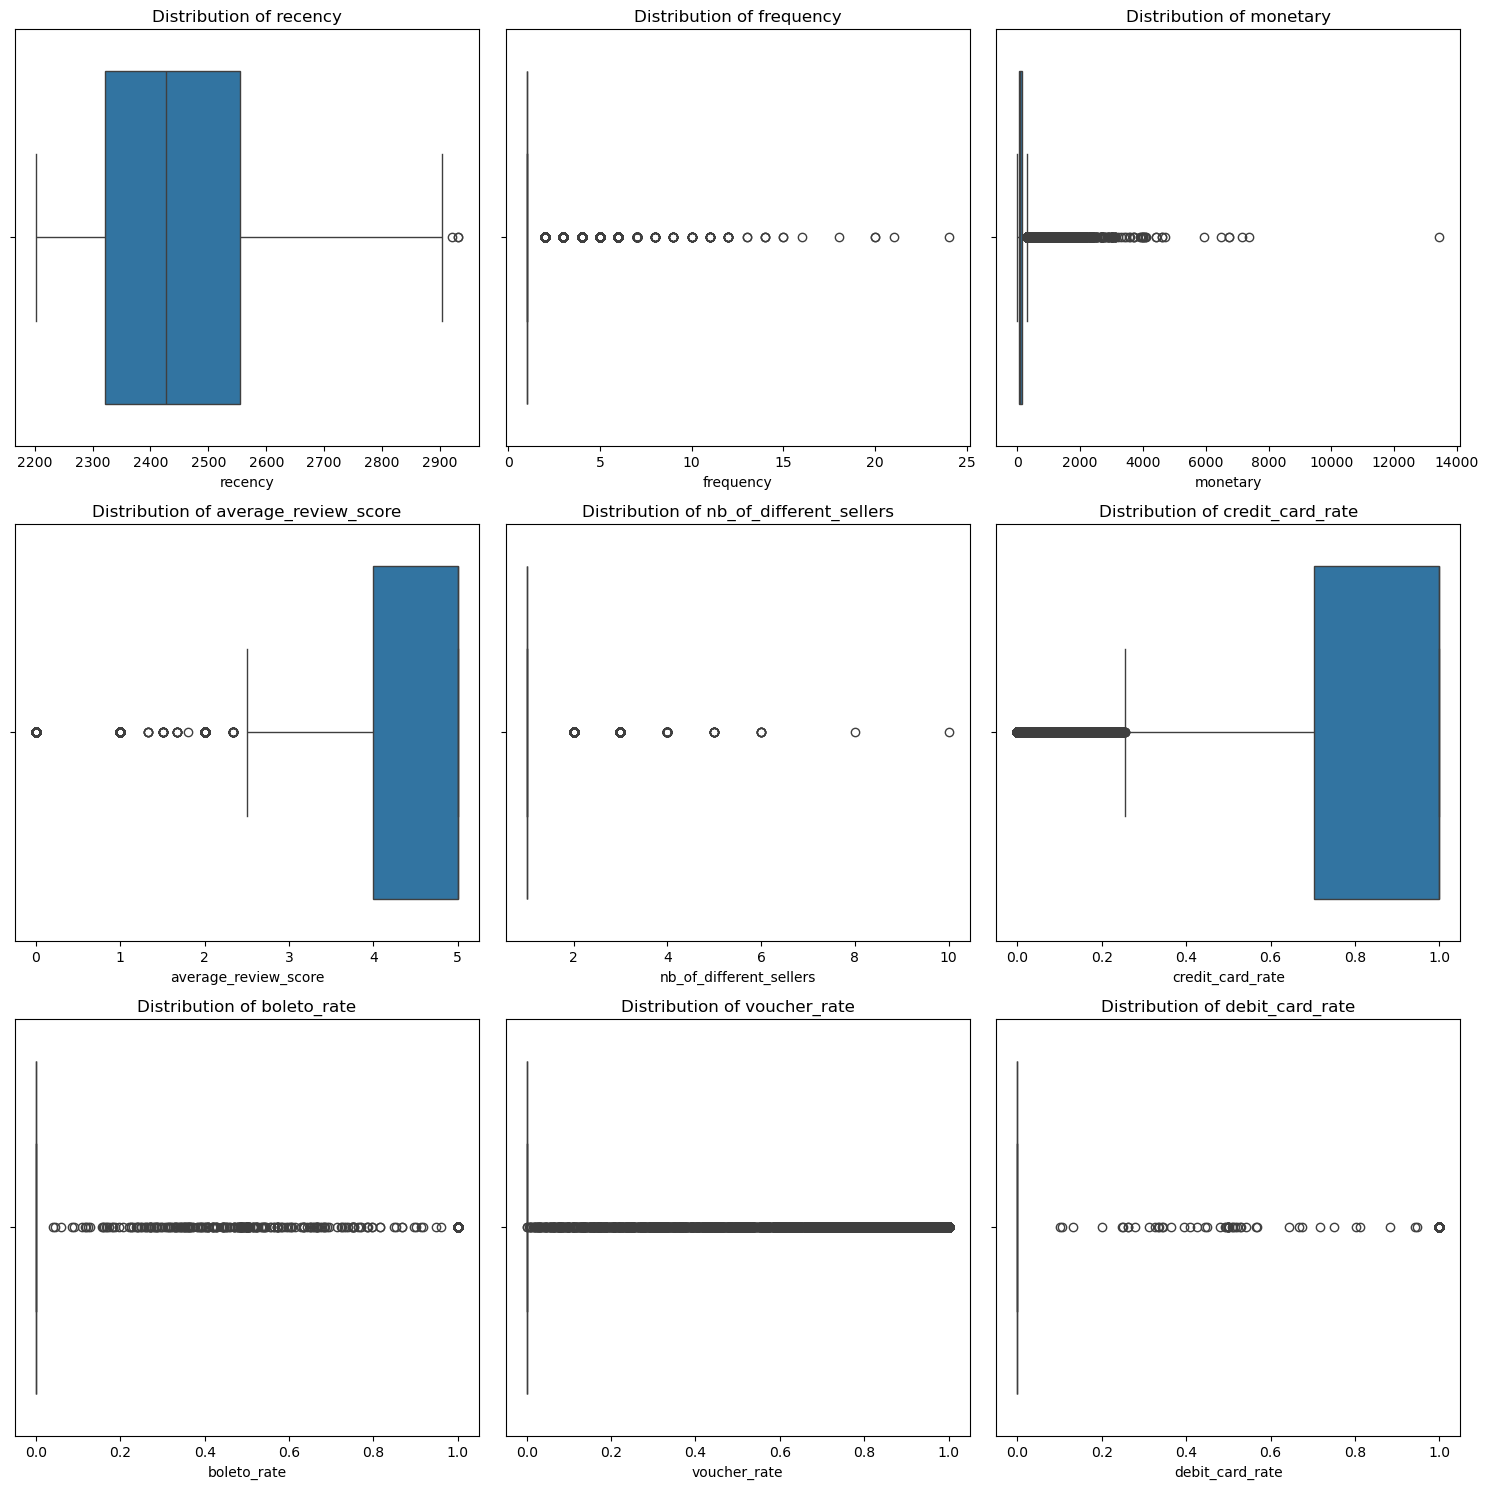

In [17]:
plot_boxplots(df_grouped, rfm + profile + rates) 

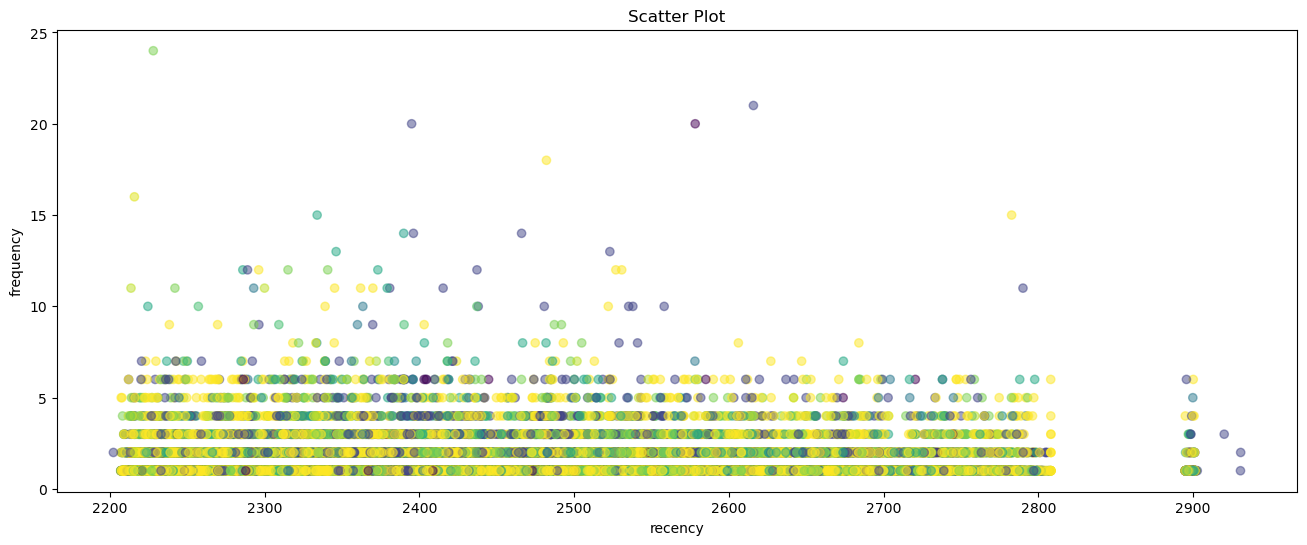

In [18]:
plot_scatterplot(df_grouped, ['recency', 'frequency'], c=df_grouped['average_review_score'])

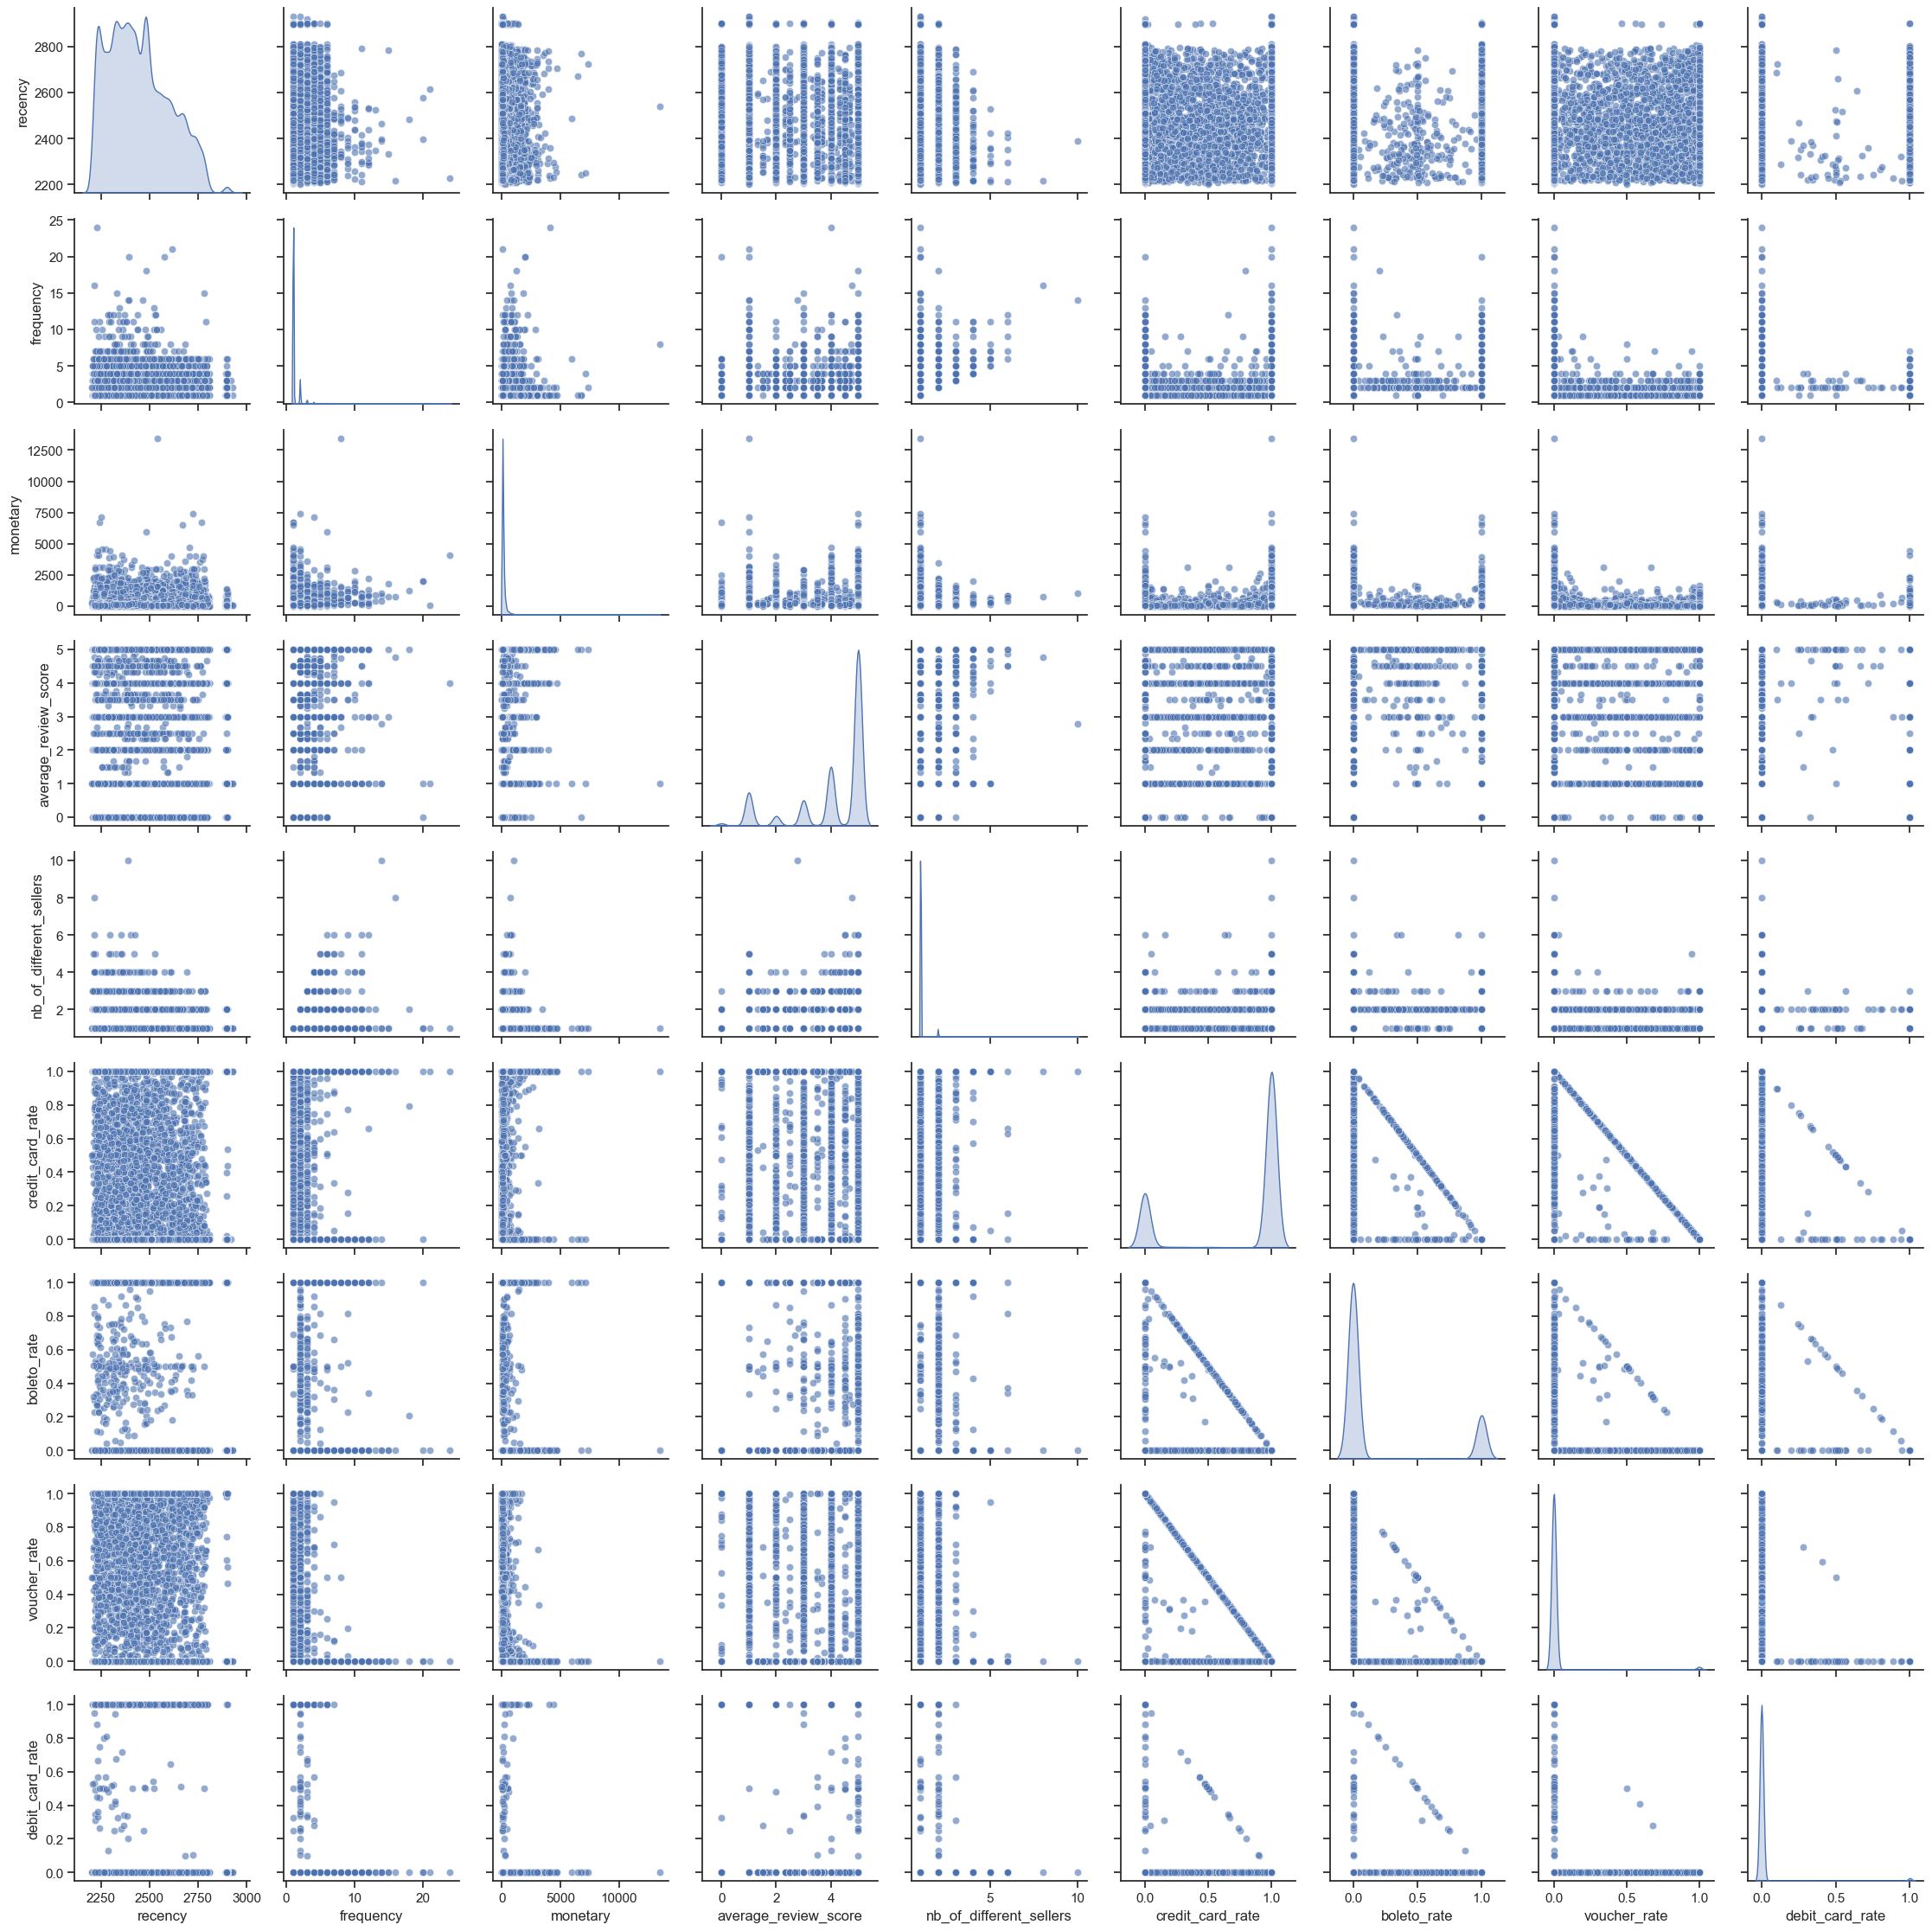

In [19]:
plot_pairplots(df_grouped, rfm + profile + rates)

Columns: ['nb_of_different_sellers', 'recency', 'frequency', 'monetary']
Cumulative variance ratio for 2 components: 43.14%
component 3: 13.51%


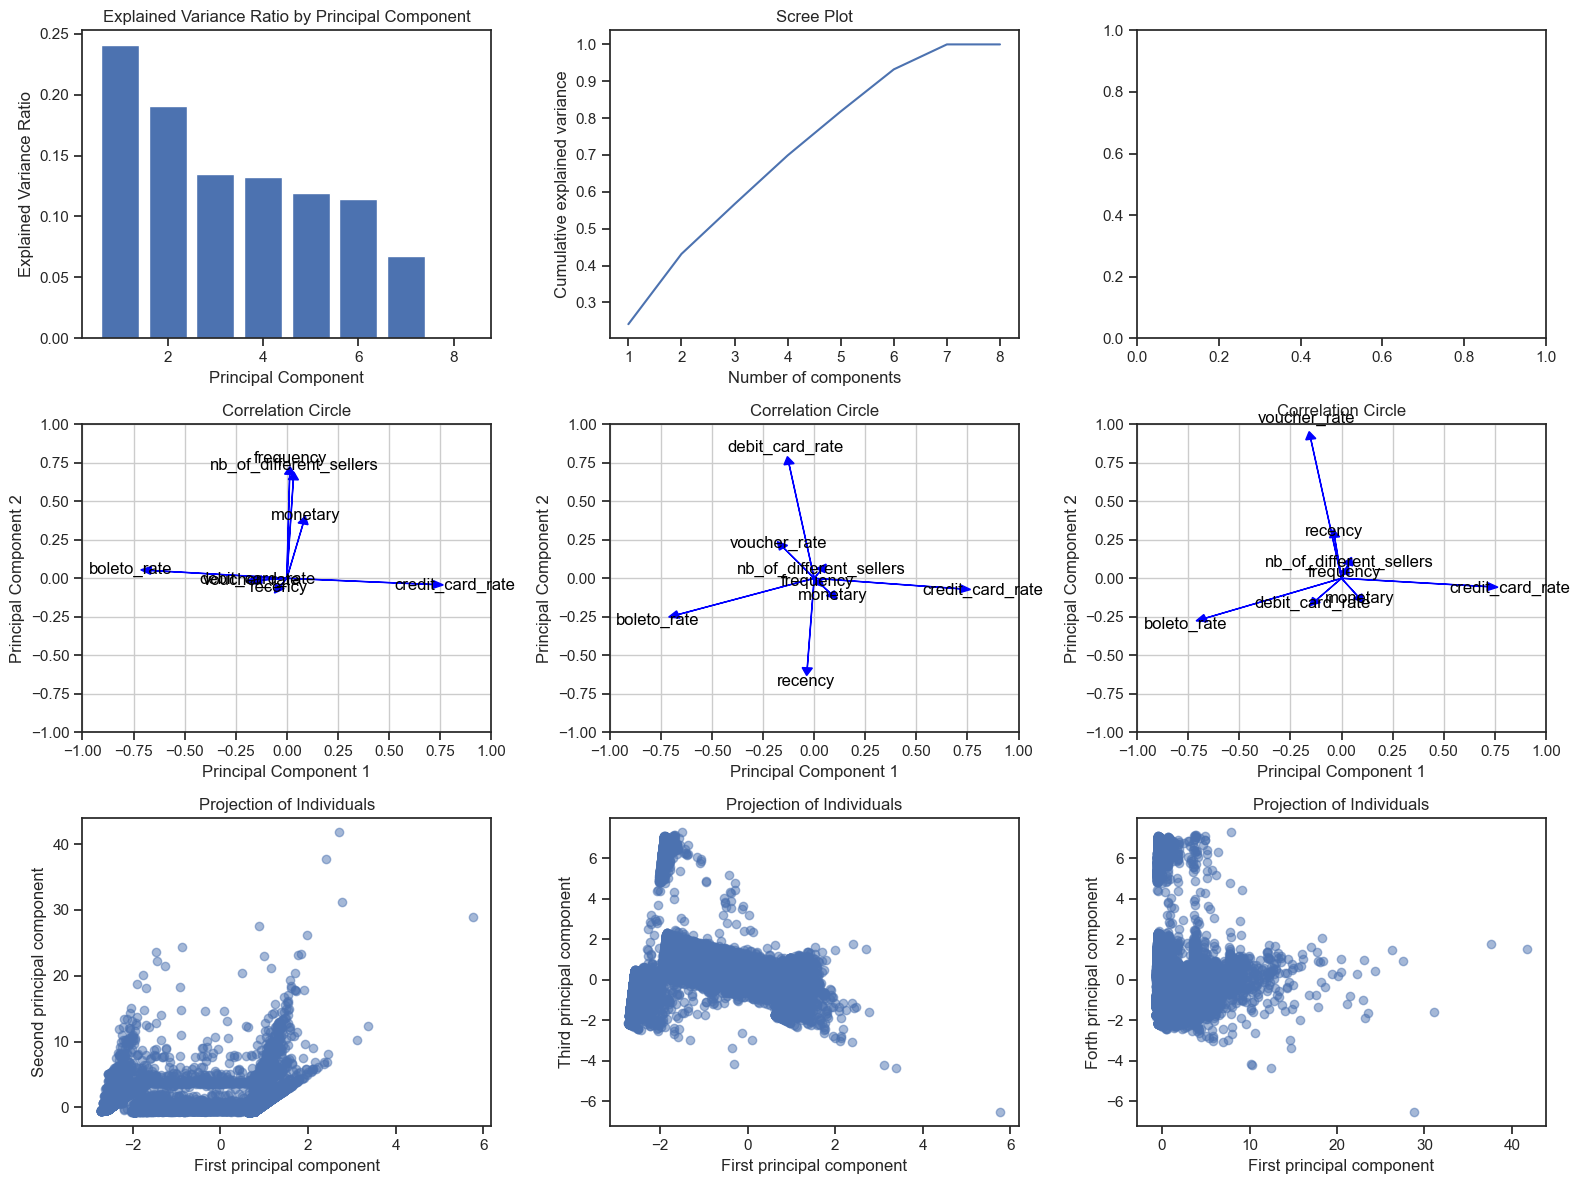

In [20]:
X = df_grouped.iloc[:,1:]
features = X.columns
X_scaled ,X_compressed = plot_scaler(X, features, categories=None, rates=rates)

In [21]:
np.savetxt("X_scaled.csv", X_scaled, delimiter=",")
np.savetxt("X_compressed.csv", X_compressed, delimiter=",")
df_grouped.to_csv('df_grouped.csv', index=False)
